<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Analysis of Police Shootings in Los Angeles</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/SeriousHyena/Sandbox/blob/master/Los_Angeles_Police_shootings.ipynb" property="cc:attributionName" rel="cc:attributionURL">Ernest Mack</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/SeriousHyena/Sandbox/blob/master/Los_Angeles_Police_shootings.ipynb" rel="dct:source">https://github.com/SeriousHyena/Sandbox/blob/master/Los_Angeles_Police_shootings.ipynb</a>.<br />Permissions beyond the scope of this license may be available at <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/SeriousHyena/Sandbox/blob/master/Los_Angeles_Police_shootings.ipynb" rel="cc:morePermissions">https://github.com/SeriousHyena/Sandbox/blob/master/Los_Angeles_Police_shootings.ipynb</a>.

## Los Angeles County Person Details - Hit Shooting Incidents and Non-Hit Shooting Incidents 2010 to Present.
### "Hit" means the victim was fired upon and struck with a bullet and "Non-Hit" means the victim was fired upon but not struck by a bullet
Dataset obtained from data.lacounty.gov

Author of this notebook: Ernest Mack

Coded in Python and Python libraries and modules by: Ernest Mack with much coding research and suggestions and code snippets from various online sources via Google!

Date: 10/28/19

## Updated October 27, 2019
Data Last Updated October 27, 2019 Metadata Last Updated April 16, 2019 Date Created September 21, 2015

## Information about this dataset can be found here:

https://data.lacounty.gov/Criminal/Person-Details-Hit-Shooting-Incidents-and-Non-Hit-/t8vk-5p9p

# Goals for this dataset:
1. Look for corellations between shootings and various factors such as age of suspect, mental health status of suspect, geolocations, suspect race, etc,
2. Produce graphics that aid in understanding the various data relationships.
3. Overlay shooting incidents onto an interactive map using Folium.

## Import Libraries

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

%matplotlib inline

## Let's read in the live data so we can stay up-to-date on the data.

#### Here we read in the file as java script object notation. The API is included in the link.

https://en.wikipedia.org/wiki/JSON

In [53]:
df = pd.read_json('https://data.lacounty.gov/resource/t8vk-5p9p.json')

In [54]:
df.columns

Index(['incident_number', 'incident_type', 'incident_date',
       'incident_location', 'city', 'state', 'zip', 'reporting_district',
       'geo_location', 'suspect_age', 'suspect_race', 'mental_health_concerns',
       'criminal_history', 'wounded', 'deceased', 'on_probation', 'on_parole',
       'under_the_influence', 'of_involved_deputies',
       'weapon_involved_category', 'weapon_involved_category_desc',
       'approx_latitude', 'approx_longitude', ':@computed_region_x8wy_s94z',
       ':@computed_region_cbw7_skn5', 'substance_name'],
      dtype='object')

In [55]:
df.head()

,incident_number,incident_type,incident_date,incident_location,city,state,zip,reporting_district,geo_location,suspect_age,suspect_race,mental_health_concerns,criminal_history,wounded,deceased,on_probation,on_parole,under_the_influence,of_involved_deputies,weapon_involved_category,weapon_involved_category_desc,approx_latitude,approx_longitude,:@computed_region_x8wy_s94z,:@computed_region_cbw7_skn5,substance_name
0,1000289,HIT SHOOTING INCIDENT,2010-01-14T15:41:00.000,500 WEST GARDENA BOULEVARD,LOS ANGELES,CA,90248.0,1699.0,"{'latitude': '33.881832', 'longitude': '-118.2...",43.0,HISPANIC,N,Y,Y,N,Y,Y,N,1,A-4,"FIREARM: Perception shooting, Suspect actions...",33.881832,-118.282796,24685,2.0,NaN
1,1000290,NON-HIT SHOOTING INCIDENT,2010-02-10T21:45:00.000,1300 WEST 139TH STREET,COMPTON,CA,90222.0,2812.0,"{'latitude': '33.90574174912721', 'longitude':...",19.0,HISPANIC,N,N,Y,N,Y,N,Y,3,A-2,"FIREARM: Suspect armed, Suspect fired at deputy",33.905742,-118.251892,24677,2.0,STIMULANT
2,1000291,HIT SHOOTING INCIDENT,2010-02-26T04:29:00.000,NORWALK BOULEVARD AND CAMBRIAN STREET,ARTESIA,CA,90701.0,1349.0,"{'latitude': '33.85705101617263', 'longitude':...",35.0,BLACK,N,N,Y,N,Y,N,N,1,B-2,"WEAPON - OTHER: Suspect armed, Suspect used w...",33.857051,-118.072289,26323,4.0,NaN
3,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",29.0,HISPANIC,N,Y,Y,N,Y,N,N,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN
4,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",18.0,HISPANIC,N,Y,Y,N,N,Y,N,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN


# Let's get some basic information about the dataset before we do anything else.

In [56]:
df.shape

(356, 26)

In [57]:
old_shape = df.shape[0] #save the column count for calculating the number of dropped columns later

### From above we can see there are 356 rows and 26 columns in the dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 26 columns):
incident_number                  356 non-null int64
incident_type                    356 non-null object
incident_date                    356 non-null object
incident_location                356 non-null object
city                             355 non-null object
state                            356 non-null object
zip                              355 non-null float64
reporting_district               354 non-null float64
geo_location                     356 non-null object
suspect_age                      347 non-null float64
suspect_race                     351 non-null object
mental_health_concerns           352 non-null object
criminal_history                 348 non-null object
wounded                          324 non-null object
deceased                         325 non-null object
on_probation                     302 non-null object
on_parole                        304 non-null

### Get the number of Null values and their locations so we can figure out what we may need to do with them or not.

In [59]:
df.isnull().sum()

incident_number                    0
incident_type                      0
incident_date                      0
incident_location                  0
city                               1
state                              0
zip                                1
reporting_district                 2
geo_location                       0
suspect_age                        9
suspect_race                       5
mental_health_concerns             4
criminal_history                   8
wounded                           32
deceased                          31
on_probation                      54
on_parole                         52
under_the_influence               51
of_involved_deputies               0
weapon_involved_category           4
weapon_involved_category_desc      4
approx_latitude                    2
approx_longitude                   2
:@computed_region_x8wy_s94z        0
:@computed_region_cbw7_skn5        8
substance_name                   251
dtype: int64

## Drop rows with null values by-column name. I will re-visit this decision as it will effect the overall statiscal outcome.

In [60]:
df = df.dropna(how='any', subset=['on_parole', 'on_probation', 'city', 'reporting_district', 'wounded', 'deceased', 'under_the_influence'])
df.isnull().sum()
new_shape = df.shape[0]

print('The number of rows dropped is ', new_shape - old_shape)
print('The current number of rows is now ', df.shape[0])

The number of rows dropped is  -79
The current number of rows is now  277


# I need to write a function that will do this for each column and thus reduce the amount of code

# Let's fix the 'mental_health_concerns' entries
### Let's replace the 'Y' and 'N' values in the 'mental_health_concerns' column with 1 and 0 to make it a binary column so we can do some analysis

In [61]:


# creating a dict file  
under_influence = {'Y': 1,'N': 0} 

# traversing through dataframe 
# values where key matches 
df.under_the_influence = [under_influence[item] for item in df.under_the_influence] 

In [62]:
# creating a dict file  
mental_health = {'Y': 1,'N': 0} 

# traversing through dataframe 
# values where key matches 
df.mental_health_concerns = [mental_health[item] for item in df.mental_health_concerns] 

# Let's fix the 'criminal_history' entries now-I need to write a function to handle this so that I am not duplicating code

In [63]:
#let's fix the wounded column entries
# creating a dict file  
wounded_col = {'Y': 1,'N': 0} 

# traversing through dataframe  
# values where key matches 
df.wounded = [wounded_col[item] for item in df.wounded]
####################################################################################

In [64]:
# creating a dict file  
crim_hist = {'Y': 1,'N': 0} 

# traversing through dataframe  
# values where key matches 
df.criminal_history = [crim_hist[item] for item in df.criminal_history]
###################################################################################

In [65]:
#let's fix the deceased column entries
# creating a dict file  
deceased_col = {'Y': 1,'N': 0} 

# traversing through dataframe  
# values where key matches 
df.deceased = [deceased_col[item] for item in df.deceased]
####################################################################################

In [66]:
pd.set_option('display.max_columns', None)
df.head(7)

,incident_number,incident_type,incident_date,incident_location,city,state,zip,reporting_district,geo_location,suspect_age,suspect_race,mental_health_concerns,criminal_history,wounded,deceased,on_probation,on_parole,under_the_influence,of_involved_deputies,weapon_involved_category,weapon_involved_category_desc,approx_latitude,approx_longitude,:@computed_region_x8wy_s94z,:@computed_region_cbw7_skn5,substance_name
0,1000289,HIT SHOOTING INCIDENT,2010-01-14T15:41:00.000,500 WEST GARDENA BOULEVARD,LOS ANGELES,CA,90248.0,1699.0,"{'latitude': '33.881832', 'longitude': '-118.2...",43.0,HISPANIC,0,1,1,0,Y,Y,0,1,A-4,"FIREARM: Perception shooting, Suspect actions...",33.881832,-118.282796,24685,2.0,NaN
1,1000290,NON-HIT SHOOTING INCIDENT,2010-02-10T21:45:00.000,1300 WEST 139TH STREET,COMPTON,CA,90222.0,2812.0,"{'latitude': '33.90574174912721', 'longitude':...",19.0,HISPANIC,0,0,1,0,Y,N,1,3,A-2,"FIREARM: Suspect armed, Suspect fired at deputy",33.905742,-118.251892,24677,2.0,STIMULANT
2,1000291,HIT SHOOTING INCIDENT,2010-02-26T04:29:00.000,NORWALK BOULEVARD AND CAMBRIAN STREET,ARTESIA,CA,90701.0,1349.0,"{'latitude': '33.85705101617263', 'longitude':...",35.0,BLACK,0,0,1,0,Y,N,0,1,B-2,"WEAPON - OTHER: Suspect armed, Suspect used w...",33.857051,-118.072289,26323,4.0,NaN
3,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",29.0,HISPANIC,0,1,1,0,Y,N,0,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN
4,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",18.0,HISPANIC,0,1,1,0,N,Y,0,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN
5,1000292,HIT SHOOTING INCIDENT,2010-03-09T11:32:00.000,6300 BEAR AVENUE,BELL GARDENS,CA,90201.0,3199.0,"{'latitude': '33.980614', 'longitude': '-118.1...",55.0,HISPANIC,1,0,1,0,Y,N,1,1,A-1,"FIREARM: Suspect armed, Firearm recovered",33.980614,-118.197058,24345,1.0,STIMULANT
6,1000293,HIT SHOOTING INCIDENT,2010-03-24T00:14:00.000,3900 DOBINSON STREET,LOS ANGELES,CA,90063.0,272.0,"{'latitude': '34.048984', 'longitude': '-118.1...",31.0,HISPANIC,1,0,1,0,Y,N,1,1,A-4,"FIREARM: Perception shooting, Suspect actions...",34.048984,-118.182560,24028,1.0,ALCOHOL


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 343
Data columns (total 26 columns):
incident_number                  277 non-null int64
incident_type                    277 non-null object
incident_date                    277 non-null object
incident_location                277 non-null object
city                             277 non-null object
state                            277 non-null object
zip                              277 non-null float64
reporting_district               277 non-null float64
geo_location                     277 non-null object
suspect_age                      277 non-null float64
suspect_race                     277 non-null object
mental_health_concerns           277 non-null int64
criminal_history                 277 non-null int64
wounded                          277 non-null int64
deceased                         277 non-null int64
on_probation                     277 non-null object
on_parole                        277 non-null obj

# Do some Initial Visualizations. 
### Some of these may seem ambiguous or irrelevant unless you are looking for the specific correlation referenced. They are as-much exercises in extracting correlative data from the dataframe as anything else.

# Lets review the race of the suspect involved in the police shooting 

In [82]:
df['suspect_race'].value_counts()


HISPANIC             158
BLACK                 76
WHITE                 40
ASIAN-PACIFIC ISL      1
OTHER                  1
UNKNOWN                1
Name: suspect_race, dtype: int64

### Create a boolean mask for each race to use in plotting some graphics

In [96]:
hispanic_mask = df['suspect_race'] == 'HISPANIC'
black_mask = df['suspect_race'] == 'BLACK'
white_mask = df['suspect_race'] == 'WHITE'
asian_mask = df['suspect_race'] == 'ASIAN-PACIFIC-ISL'
other_mask = df['suspect_race'] == 'OTHER'

#now create new columns from our boolean masks
df['hispanic'] = df['suspect_race'] == 'HISPANIC'
df['black'] = df['suspect_race'] == 'BLACK'
df['white'] = df['suspect_race'] == 'WHITE'
df['asian'] = df['suspect_race'] == 'ASIAN-PACIFIC-ISL'
df['other'] = df['suspect_race'] == 'OTHER'
df.head()

,incident_number,incident_type,incident_date,incident_location,city,state,zip,reporting_district,geo_location,suspect_age,suspect_race,mental_health_concerns,criminal_history,wounded,deceased,on_probation,on_parole,under_the_influence,of_involved_deputies,weapon_involved_category,weapon_involved_category_desc,approx_latitude,approx_longitude,:@computed_region_x8wy_s94z,:@computed_region_cbw7_skn5,substance_name,hispanic,black,white,asian,other
0,1000289,HIT SHOOTING INCIDENT,2010-01-14T15:41:00.000,500 WEST GARDENA BOULEVARD,LOS ANGELES,CA,90248.0,1699.0,"{'latitude': '33.881832', 'longitude': '-118.2...",43.0,HISPANIC,0,1,1,0,Y,Y,0,1,A-4,"FIREARM: Perception shooting, Suspect actions...",33.881832,-118.282796,24685,2.0,NaN,True,False,False,False,False
1,1000290,NON-HIT SHOOTING INCIDENT,2010-02-10T21:45:00.000,1300 WEST 139TH STREET,COMPTON,CA,90222.0,2812.0,"{'latitude': '33.90574174912721', 'longitude':...",19.0,HISPANIC,0,0,1,0,Y,N,1,3,A-2,"FIREARM: Suspect armed, Suspect fired at deputy",33.905742,-118.251892,24677,2.0,STIMULANT,True,False,False,False,False
2,1000291,HIT SHOOTING INCIDENT,2010-02-26T04:29:00.000,NORWALK BOULEVARD AND CAMBRIAN STREET,ARTESIA,CA,90701.0,1349.0,"{'latitude': '33.85705101617263', 'longitude':...",35.0,BLACK,0,0,1,0,Y,N,0,1,B-2,"WEAPON - OTHER: Suspect armed, Suspect used w...",33.857051,-118.072289,26323,4.0,NaN,False,True,False,False,False
3,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",29.0,HISPANIC,0,1,1,0,Y,N,0,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN,True,False,False,False,False
4,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",18.0,HISPANIC,0,1,1,0,N,Y,0,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN,True,False,False,False,False


# Plot Histogram of Suspect Race

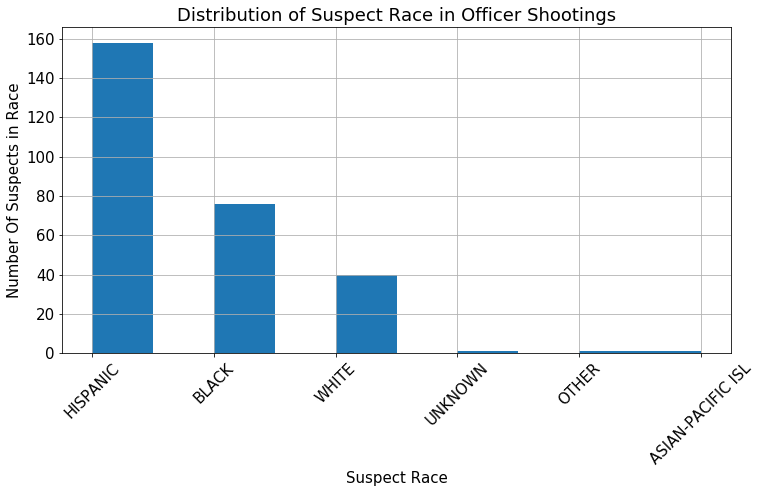

In [177]:
plt.figure(figsize=[12, 6])
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=45)
plt.xlabel('Suspect Race')
plt.ylabel('Number Of Suspects in Race')
plt.title('Distribution of Suspect Race in Officer Shootings')
df['suspect_race'].hist()
plt.show()

#### The histogram above shows that there were twice as many hispanic suspects shot-at versus Black Suspects. There were only half as many white suspects shot-at versus black suspects. This indicates that Hispanics are the most-targeted racial group followed by black and trailing with white suspects. It interesting to note that in the observation period for the data there was only one isolated case involving an Asian suspect. Clearly, Hispanics and Blacks outnumber all other racial groups in this observation period.

In [137]:
df['suspect_race'].value_counts()

HISPANIC             158
BLACK                 76
WHITE                 40
ASIAN-PACIFIC ISL      1
OTHER                  1
UNKNOWN                1
Name: suspect_race, dtype: int64

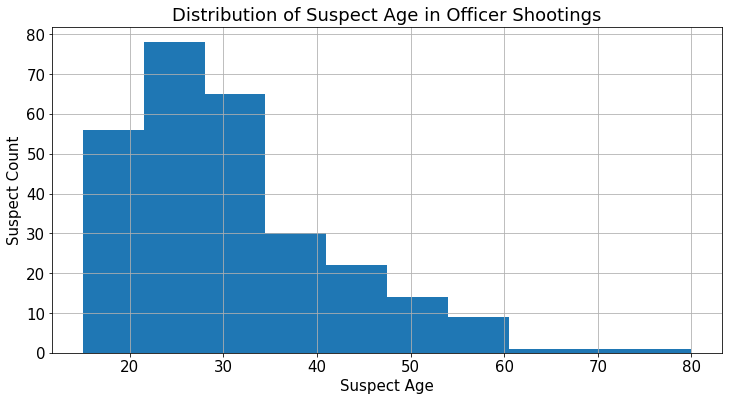

In [176]:
plt.figure(figsize=[12, 6])
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=0)
plt.xlabel('Suspect Age')
plt.ylabel('Suspect Count')
plt.title('Distribution of Suspect Age in Officer Shootings')
df['suspect_age'].hist()
plt.show()

#### Here we can see that the most represented age range is about 22-28 years-old with around 78 shooting incidents for this range. 

In [169]:
df['suspect_age'].value_counts()

24.0    21
31.0    16
28.0    14
27.0    14
21.0    14
25.0    13
29.0    12
22.0    11
18.0    11
19.0    10
23.0    10
26.0     9
35.0     9
20.0     8
30.0     8
17.0     8
37.0     7
32.0     6
39.0     6
41.0     5
34.0     5
33.0     4
49.0     4
43.0     4
45.0     4
36.0     4
47.0     3
15.0     3
55.0     3
51.0     3
42.0     2
44.0     2
46.0     2
38.0     2
57.0     2
53.0     2
50.0     2
16.0     2
40.0     2
60.0     2
48.0     2
80.0     1
54.0     1
61.0     1
68.0     1
56.0     1
52.0     1
Name: suspect_age, dtype: int64

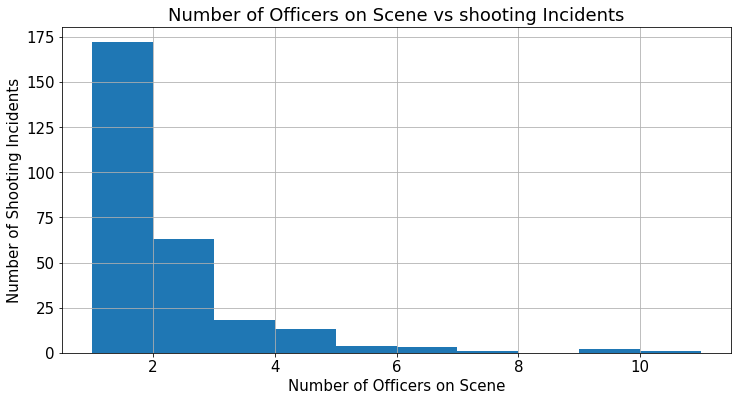

In [178]:
plt.figure(figsize=[12, 6])
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=0)
plt.xlabel('Number of Officers on Scene')
plt.ylabel('Number of Shooting Incidents')
plt.title('Number of Officers on Scene vs shooting Incidents')
df['of_involved_deputies'].hist()
plt.show()

### Here we can see that greates number of police shootings occur when there is a lone officer or two officers. As can also be seen the greater the number of officers the less likely for there to be a shooting incident.

# Identify interesting correlations

In [21]:
df.columns

Index(['incident_number', 'incident_type', 'incident_date',
       'incident_location', 'city', 'state', 'zip', 'reporting_district',
       'geo_location', 'suspect_age', 'suspect_race', 'mental_health_concerns',
       'criminal_history', 'wounded', 'deceased', 'on_probation', 'on_parole',
       'under_the_influence', 'of_involved_deputies',
       'weapon_involved_category', 'weapon_involved_category_desc',
       'approx_latitude', 'approx_longitude', ':@computed_region_x8wy_s94z',
       ':@computed_region_cbw7_skn5', 'substance_name'],
      dtype='object')

## Get the number of those wounded, deceased and with mental health concerns - wrote function to do this!!

In [20]:
def get_stats(col): #define the function
    '''this function calculates the number of suspects involved in the police shootings with the associated 
    criteria as described in the column of the dataset (col) takes input from the column name and then the 
    function outputs the column name as a string into the print statement after a boolean check for Y indicating a 
    kill, wounding or mental health concern or whatever else is input to the (col) parameter'''
    sus = df[col].value_counts() #get the counts of the entries with 'Y' and assign to a variable
    sus = dict(sus) #convert into a dictionary in order to access as key:value
    
    for i in sus: #iterate through the dictionary
        if i == 1: #boolean check for '1' or yes to the condition
            print('There were ', sus[i], 'suspects documented as',col, 'in police shootings in the observation period.') #print only the positive entries         

In [21]:
get_stats('deceased')
get_stats('wounded')
get_stats('mental_health_concerns')

There were  104 suspects documented as deceased in police shootings in the observation period.
There were  116 suspects documented as wounded in police shootings in the observation period.
There were  32 suspects documented as mental_health_concerns in police shootings in the observation period.


# Map the police shootings with Folium

## Remove any rows with NaN values as Folium will error on NaN's

In [22]:
old_coord_row_count = df.shape[0] #save the column count for calculating the number of dropped columns later

df = df.dropna(how='any', subset=['approx_latitude', 'approx_longitude'])
df.isnull().sum()
new_coord_row_count = df.shape[0]

print('The number of rows dropped is ', new_coord_row_count - old_coord_row_count)
print('The current number of rows is now ', df.shape[0])

The number of rows dropped is  0
The current number of rows is now  277


### First create two lists to hold my lat and long coordinates

In [23]:
lat = df.iloc[:,[21]]
long = df.iloc[:,[22]]

lat = lat.values.tolist()
long = long.values.tolist()
print('lat is ',type(lat))
print('long is', type(long))
print(lat[:5])
print(long[:5])

lat is  <class 'list'>
long is <class 'list'>
[[33.881832], [33.90574174912721], [33.85705101617263], [33.953839], [33.953839]]
[[-118.282796], [-118.25189214720194], [-118.07228900610721], [-118.202349], [-118.202349]]


## Use Pandas .itterows() to build a list from the lat and long columns so I can feed a full coordinate into Folium

In [24]:
coord_complete = [] #new empty list

for index, row in df.iterrows(): #iterate through the rows for the lat long columns
    coord_complete += (row['approx_latitude'], row['approx_longitude']) #add the lat long to the new list 

In [25]:
print('The new list has',len(coord_complete), 'entries')

The new list has 554 entries


# Now Plot An Interactive Map

In [26]:
la_coords = (34.0522, -118.2437) #the coordinates od los angeles center

# create empty map zoomed in to Los Angeles
m = folium.Map(location=la_coords, zoom_start=9)

tooltip = 'Click for more info!'
 
#add marker one by one on the map by iterating through the dataframe columns with the coordinates
for i in range(0,len(df)): #set the iterator to 0 and range to be the length of data in the coordinate rows
    folium.Marker([df.iloc[i]['approx_latitude'], df.iloc[i]['approx_longitude']], popup=df.iloc[i]['weapon_involved_category_desc']).add_to(m)
    
m

## More to be done . . .

1. Get count of prior criminal history versus no prior history

2. Get stats on race of person involved
3. 